In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

    # prepare and preprocess the dataset
    # extract the data relevant features from the dataset
    # for each class in the dataset, calculate the prior probability P(C)
    # find the likelihood probability, P(X|C)
        # P(C|X)=P(X|C).P(C)/P(X)
        # P(X|C) => LIKELIHOOD PROBABILITY
        # P(C) => CLASS PRIOR PROBABILITY
        # P(X) => PREDICTOR PRIOR PROBABILITY
    # Select the class with higher probability and evaluate the performance of the model

In [2]:
dataset=pd.read_csv(r"D:\SEM 6\ML LAB\PROBLEMS\2. Baysian classifier\vehicle_stolen_dataset_ with_headers.csv")#,names=['parents','has_nurs','form','children','housing','finance','social','health','label'])
dataset

,number_plate,brand,color,time,stoled
0,N001,BMW,black,night,yes
1,N002,Audi,black,night,no
2,N003,NISSAN,black,night,yes
3,N004,VEGA,red,day,yes
4,N005,BMW,blue,day,no
5,N006,Audi,black,day,yes
6,N007,VEGA,red,night,no
7,N008,Audi,blue,day,yes
8,N009,VEGA,black,day,yes
9,N010,NISSAN,blue,day,no


In [3]:
for i in dataset:
    print(i," has these unique values:",dataset[i].unique())

number_plate  has these unique values: ['N001' 'N002' 'N003' 'N004' 'N005' 'N006' 'N007' 'N008' 'N009' 'N010'
 'N011' 'N012' 'N013' 'N014' 'N015' 'N016' 'N017' 'N018' 'N019' 'N020']
brand  has these unique values: ['BMW' 'Audi' 'NISSAN' 'VEGA']
color  has these unique values: ['black' 'red' 'blue']
time  has these unique values: ['night' 'day']
stoled  has these unique values: ['yes' 'no']


In [5]:
print(dataset.isnull().sum())

number_plate    0
brand           0
color           0
time            0
stoled          0
dtype: int64


In [6]:
dataset.dtypes

number_plate    object
brand           object
color           object
time            object
stoled          object
dtype: object

In [7]:
dataset.fillna(method ='ffill', inplace = True)

C:\Users\23820\AppData\Local\Temp\ipykernel_3696\1594622511.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method ='ffill', inplace = True)


In [8]:
dataset.loc[dataset["color"] == "black", "color"] = "BLACK"
dataset.loc[dataset["color"] == "red", "color"] = "RED"
dataset.loc[dataset["color"] == "blue", "color"] = "BLUE"

In [9]:
dataset

,number_plate,brand,color,time,stoled
0,N001,BMW,BLACK,night,yes
1,N002,Audi,BLACK,night,no
2,N003,NISSAN,BLACK,night,yes
3,N004,VEGA,RED,day,yes
4,N005,BMW,BLUE,day,no
5,N006,Audi,BLACK,day,yes
6,N007,VEGA,RED,night,no
7,N008,Audi,BLUE,day,yes
8,N009,VEGA,BLACK,day,yes
9,N010,NISSAN,BLUE,day,no


In [10]:
dataset.isnull().sum()

number_plate    0
brand           0
color           0
time            0
stoled          0
dtype: int64

In [11]:
X = dataset.drop(['stoled'], axis=1)
y = dataset['stoled']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)

In [13]:
import category_encoders as ce

In [14]:
encoder = ce.OneHotEncoder(cols=['number_plate','brand','color','time'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [15]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)

<Axes: >

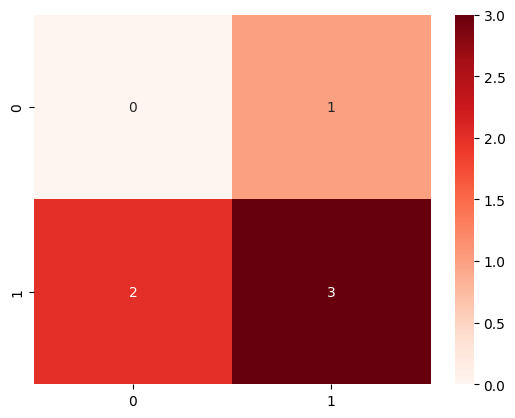

In [17]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Reds')

<Axes: >

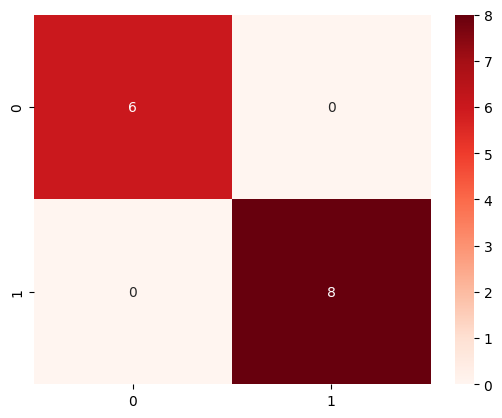

In [18]:
cm=confusion_matrix(y_train,y_train_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Reds')

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('Model accuracy score: {0:0.4f}\n'. format(accuracy_score(y_test,y_pred)))
print("\n Confusion Matrix \n")
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report\n")
print(classification_report(y_train, y_train_pred))

Model accuracy score: 0.5000


 Confusion Matrix 

[[6 0]
 [0 8]]
[[0 1]
 [2 3]]

 Classification Report

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         6
         yes       1.00      1.00      1.00         8

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [20]:
# store the predicted probabilities for class 1 - Probability of not_recom
y_pred1 = gnb.predict_proba(X_test)[:, 1]

C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


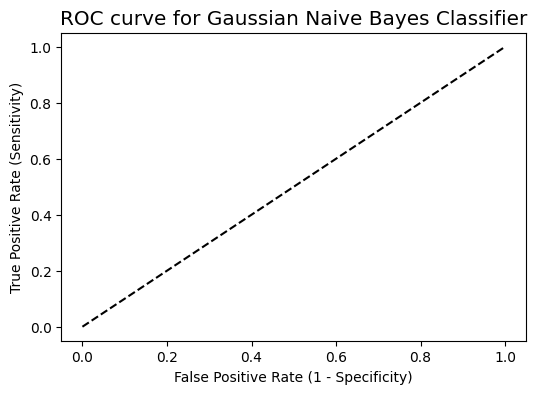

In [21]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'not_recom')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

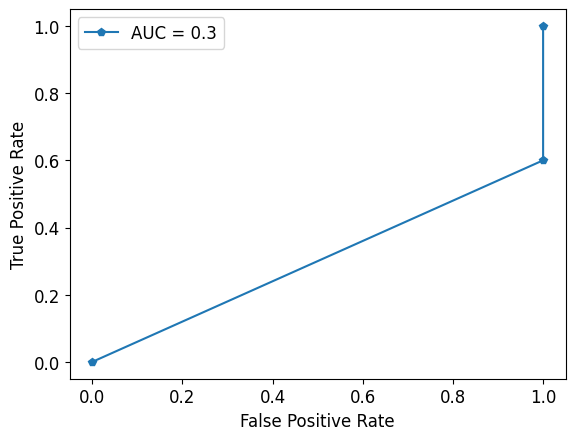

In [22]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

y_true_binary = (y_test == 'yes').astype(int)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred1)

# Plot ROC curve
plt.plot(fpr, tpr, 'p-', label=f'AUC = {auc(fpr, tpr)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Reds')
print('Model accuracy score: {0:0.4f}\n'. format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))
from sklearn.metrics import auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr, 'p-',label=f'AUC = {auc(fpr,tpr)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [23]:
pip install category_encoders